In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from sklearn.decomposition import SparseCoder

## load the data

In [17]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

## preprocess the data (flatten and normalize it)

In [18]:
x_train = x_train.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28 * 28)

x_test = x_test.astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28)


In [19]:
n_samples = x_train.shape[0]
n_samples

60000

In [20]:
n_components = 64   # number of dict elements
random_indices = np.random.randint(0, n_samples, size=n_components)
random_indices

array([39839, 49553, 43773,   833, 40238, 25515, 13945, 43734, 58522,
        9988, 15996, 30421, 35222,  5455, 25909, 10005, 56258, 41023,
       48493, 22808, 41345, 35699, 57453, 12489, 16539, 11804, 32164,
       15915, 29113, 58832, 56240, 10766, 29988, 35255, 34695, 16768,
       32407, 55323, 42877, 49189, 16316, 52776, 17891,  6416,  3249,
       38340,   714,  5889, 40706, 38767,  4438,  2071, 57851, 21731,
       56224, 24634, 43230, 20686, 25315, 35338, 40392, 21144,  8076,
       15388])

In [21]:
D = x_train[random_indices]   # as dict elements

In [22]:
D.shape

(64, 784)

In [23]:
sparse_coder = SparseCoder(dictionary=D,
                           transform_n_nonzero_coefs=3,
                           transform_algorithm="lars")
sparse_codes = sparse_coder.transform(x_test)

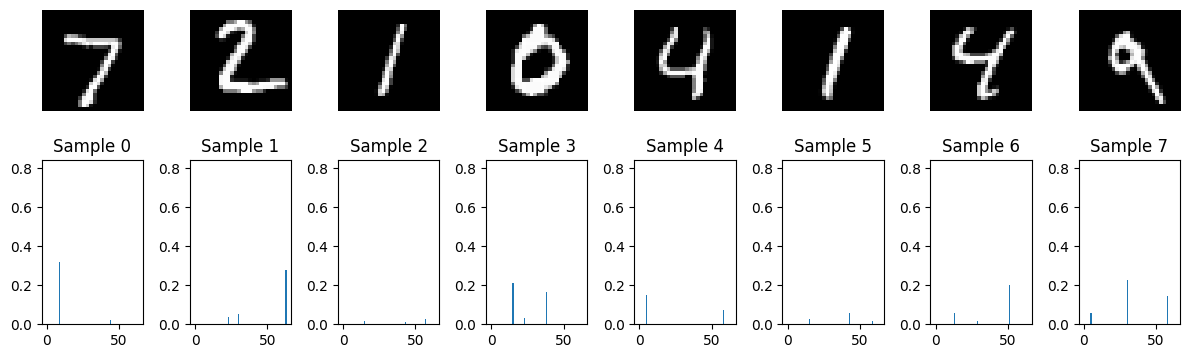

In [24]:
fig, axes = plt.subplots(2, 8, figsize=(12, 4))

for i in range(8):
  # original image
  axes[0, i].imshow(x_test[i].reshape(28, 28), cmap="gray")
  axes[0, i].axis("off")

  # sparse representation (non-zero coefs)
  axes[1, i].bar(range(n_components), sparse_codes[i])
  axes[1, i].set_ylim(0, np.max(sparse_codes))
  axes[1, i].set_title(f"Sample {i}")

plt.tight_layout()
plt.show()